In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 12, 6
matplotlib.rcParams['font.size'] = 18  # Probably OS Dependent

date
2020-04-14    156.0
2020-04-15     89.0
2020-04-16    369.0
2020-04-17    293.0
2020-04-18    357.0
Name: delta_cases, dtype: float64

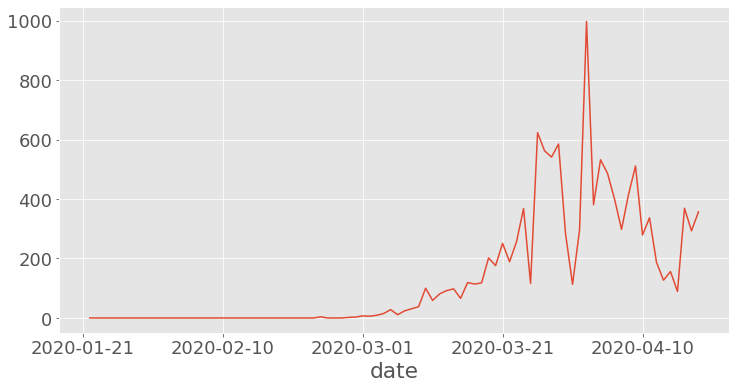

In [3]:
US_DIR = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df_whole = pd.read_csv(US_DIR)

df = df_whole.loc[df_whole['state'] == 'Washington', :].set_index('date')
df.loc[:, 'delta_cases'] = df['cases'] - df['cases'].shift()
df['delta_cases'].plot()
df['delta_cases'].tail()

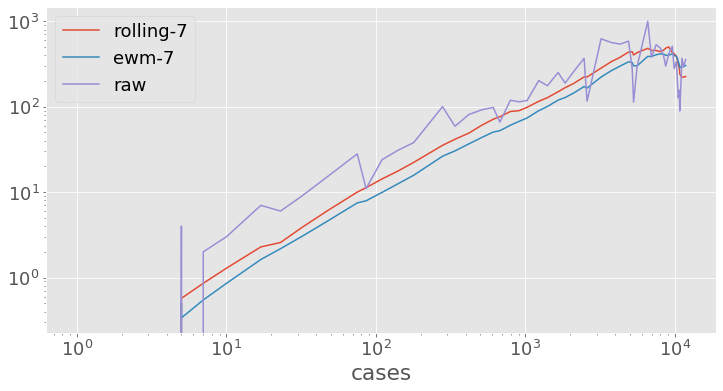

In [4]:
series = df.set_index('cases')['delta_cases']
pd.DataFrame({
    'rolling-7': series.rolling(7).mean(),
    'ewm-7': series.ewm(7).mean(),
    'raw': series,
}).plot(loglog=True)

date
2020-04-14     71.0
2020-04-15     77.0
2020-04-16    112.0
2020-04-17     93.0
2020-04-18    161.0
Name: delta_cases, dtype: float64

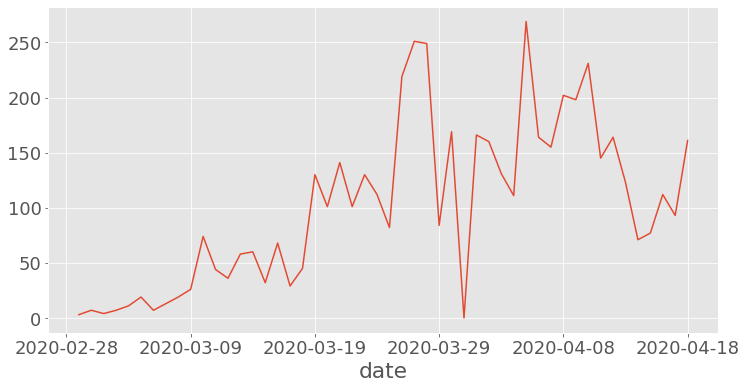

In [5]:
US_DIR = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
df_whole = pd.read_csv(US_DIR)

df = df_whole[(df_whole['state'] == 'Washington') & (df_whole['county'] == 'King')].set_index('date')
df.loc[:, 'delta_cases'] = df['cases'] - df['cases'].shift()
df['delta_cases'].plot()
df['delta_cases'].tail()

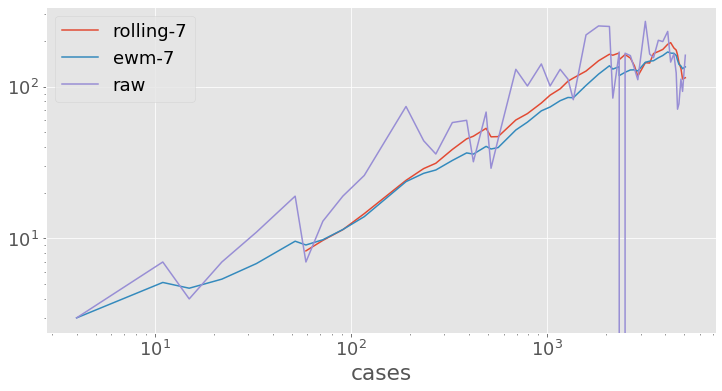

In [6]:
series = df.set_index('cases')['delta_cases']
pd.DataFrame({
    'rolling-7': series.rolling(7).mean(),
    'ewm-7': series.ewm(7).mean(),
    'raw': series,
}).plot(loglog=True)